<a href="https://colab.research.google.com/github/wputriproject/wputriproject/blob/main/Fundamental_Data_Visualization_with_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Sumber Materi : DQLab Academy
Saya telah menyelesaikan modul Data Analyst melalui Platform DQLab Academy tentang Fundamental Data Visualization with Python. Modul ini akan membahas beragam cara memvisualisasikan data, terutama cara memilih grafik yang tepat serta memodifikasinya agar fokus pada pesan yang ingin disampaikan. Semoga dapat dijadikan sebagai referensi belajar, bekerja dan pengembangan karya Data Analyst yang lebih relevan. Saya masih aktif mengerjakan modul melalui platform DQLab Academy. Saya juga sangat terbuka untuk melakukan analisa, visualisasi data hingga interpretasi dan pengambilan keputusan. 
#opentowork #opentodiscuss 

# **Tujuan Visualisasi Data**
1.   Exploratory
2.   Explanatory
3.   Confirmatory



# **Mini Project**

Pada bagian ini kamu akan diberikan suatu studi kasus sederhana yang akan mengukur pemahaman kamu dari modul "Introduction to Data Visualization". 

# Visualisasi Data 

Salah satu data yang hendak ditampilkan adalah jumlah karyawan berdasarkan jenis kelamin dalam kelompok usia tertentu. Pimpinan perusahaan ingin melihat postur jumlah karyawan laki-laki dan perempuan berdasarkan rentang usia. Grafik itu membandingkan banyaknya jumlah karyawan laki-laki dan perempuan dalam setiap kelompok umur yang sama.
Tantangannya adalah, grafik tersebut harus menunjukkan postur jumlah karyawan berdasarkan jenis kelamin dan rentang usianya sekaligus.
Target
1.	Grafik yang lebih simpel dan hemat ruang.
2.	Komparasi jumlah karyawan laki-laki dan perempuan berdasarkan rentang usia
Visualiasasi dilakukan menggunakan Matplotlib (salah satu library plotting di Python).

# *Visualisasi - Part 1: Matplotlib*
Untuk membuat visualisasi dari data yang telah disediakan silakan diketikkan kembali kode berikut di code editor 

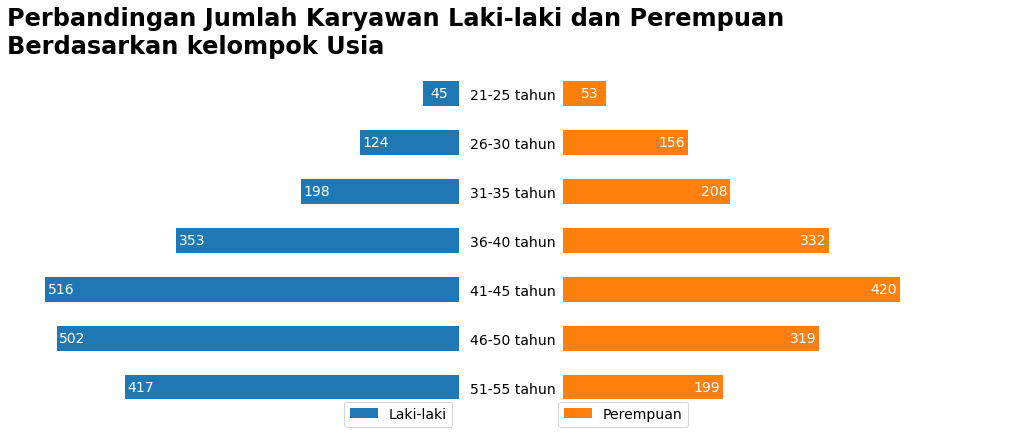

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

tabel = (pd.read_csv("https://storage.googleapis.com/dqlab-dataset/usia_karyawan.csv")
		.sort_values("Kelompok Usia", ascending=False)
		.set_index("Kelompok Usia")
		)
tabel["Laki-laki"] = -tabel["Laki-laki"]

fig, axes = plt.subplots(1, 2, figsize=(14, 6))
fig.suptitle("Perbandingan Jumlah Karyawan Laki-laki dan Perempuan\nBerdasarkan kelompok Usia",
			x=0., y=1.0, fontsize=24, fontweight="bold", ha="left")
tabel["Laki-laki"].plot(kind="barh", ax=axes[0], color="tab:blue", xlim=[-550, 0])
tabel["Perempuan"].plot(kind="barh", ax=axes[1], color="tab:orange", fontsize=14, xlim=[0, 550])
axes[0].set_ylabel("")
axes[0].tick_params(left=False, bottom=False, labelleft=False, labelbottom=False)
axes[0].legend(["Laki-laki"], fontsize=14, bbox_to_anchor=(0., 0., 1., .05))
axes[0].set_frame_on(False)
axes[1].set_ylabel("")
axes[1].tick_params(left=False, bottom=False, labelbottom=False)
axes[1].legend(["Perempuan"], fontsize=14, bbox_to_anchor=(0., 0., 0.3, .05))
axes[1].set_frame_on(False)
for i, m, w in zip(range(tabel.shape[0]), list(tabel["Laki-laki"]), list(tabel["Perempuan"])):
	axes[0].annotate(str(abs(m)), (m+20, i), xytext=(m+20, i),
					 color="w", va="center", ha="center", fontsize=14)
	axes[1].annotate(str(abs(w)), (w-20,i), xytext=(w-20, i),
					color="w", va="center", ha="center", fontsize=14)
plt.tight_layout(rect=(0,0,1,0.88))
plt.show()


Jenis grafik ini dapat menempatkan batang-batang grafik menjadi lebih berdekatan sehingga menghemat ruang tampilan
Sebagai catatan, ada trik khusus jika ingin membuatnya di Excel. Pada contoh ini, grafik tersebut sebetulnya terdiri dari dua grafik terpisah, masing-masing untuk laki-laki dan perempuan. Khusus untuk grafik laki-laki, hanya perlu mengubah nilai pada sumbu X menjadi terbaca dari kanan ke kiri (reverse order). Selain itu dapat juga mengubahnya pada jendela Format Data Series dalam Excel.

# *Visualisai - Part 2 : Matplotlib*
Tugasnya mencari karyawan dengan tren produktivitas paling baik selama satu tahun lalu untuk mendapatkan reward sebagai best employee.
Tujuannya menyajikan visualisasi data yang enak dilihat, alur narasinya tepat, dan kesimpulannya benar.
1.	Memilih jenis grafik yang benar
2.	Menyederhanakan tampilan grafik
3.	Memilah dan menonjolkan informasi yang diperlukan


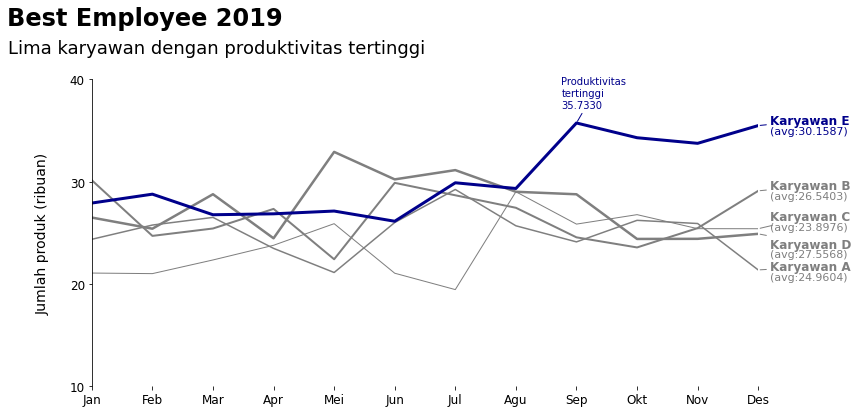

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

tabel = pd.read_csv("https://storage.googleapis.com/dqlab-dataset/produktivitas_karyawan.csv", index_col="Bulan") / 1000

fig, ax = plt.subplots(1, 1, figsize=(12,6))
fig.suptitle("Best Employee 2019", x=0.01, y=0.95, fontsize=24, fontweight="bold", ha="left")
ax.set_title("Lima karyawan dengan produktivitas tertinggi\n", fontsize=18, ha="right")

colors = ["tab:gray", "tab:gray", "tab:gray", "tab:gray", "darkblue"]
line_widths = [ 1.5, 2, 1, 2.5, 3.]
lp = tabel.plot(kind="line", ax=ax, xlim=[0, 11], ylim=[10,40], color=colors,
				xticks=range(tabel.shape[0]), yticks=[10, 20, 30, 40])

add_lbl_pos = [ 0.3, 0.5, 1.2, -1.0, 0.5]
add_avg_pos = [-0.7, -0.5, 0.2, -2.0, -0.5]
for i, item in enumerate(lp.get_lines()):
	item.set_linewidth(line_widths[i])
	lbl = item.get_label()
	ax.annotate(lbl, (11, tabel.loc["Desember", lbl]),
				(11.2, tabel.loc["Desember", lbl] + add_lbl_pos[i]),
				fontweight="bold", fontsize=12, color=colors[i], va="center",
				arrowprops={"arrowstyle": "-", "color":colors[i]})
	ax.annotate("(avg:%.4f)" % tabel[lbl].mean(), (11, tabel.loc["Desember", lbl]),
				(11.2, tabel.loc["Desember", lbl] + add_avg_pos[i]),
				fontsize=11, color=colors[i], va="center")
highest_prod = tabel["Karyawan E"].max()
ax.annotate("Produktivitas\ntertinggi\n%.4f" % highest_prod,
			(8, highest_prod), (7.75, highest_prod+1.5),
			ha="left", color=colors[-1], arrowprops={"arrowstyle": "-", "color": colors[-1]})
ax.set_xticklabels([item[:3] for item in tabel.index], fontsize=12)
ax.set_yticklabels([str(i) for i in [10, 20, 30, 40]], fontsize=12)
ax.set_xlabel("")
ax.set_ylabel("Jumlah produk (ribuan)\n", fontsize=14)
ax.spines["top"].set_color("none")
ax.spines["right"].set_color("none")
ax.spines["bottom"].set_color("none")
ax.get_legend().remove()
plt.tight_layout(rect=(0,0,1,0.90))
plt.show()

Desain ini dipilih karena tujuannya adalah mencari satu karyawan yang memiliki produktivitas tertinggi. Produktivitas itu dapat terlihat dari tren kenaikan jumlah produksi dari awal hingga akhir tahun. Bisa pula terlihat dari rata-rata jumlah produksi.
Setelah satu karyawan terbaik terpilih, grafik untuk karyawan lain dapat disamarkan dengan warna lebih tipis, demikian pula tebal garisnya.
Bagaimana dengan zero baseline yang tidak dimulai dari angka nol? Di sinilah fleksibilitas grafik garis dibandingkan dengan grafik batang. Dengan grafik batang, garis dasar nol pada sumbu X wajib digunakan. Dalam contoh ini, nilai minimum sumbu Y dimulai dengan angka 10 (ribuan) dan garis sumbu X dihilangkan karena garis tersebut sering diasumsikan sebagai garis nol.

Agar desainnya lebih simpel dan mudah dipahami, perlu menyederhanakan tampilan grafik tersebut dengan langkah-langkah berikut ini:
1.	Memilih jenis grafik garis (line chart). Jenis grafik ini cocok untuk menampilkan perubahan nilai variabel dari waktu ke waktu dengan elemen yang lebih sederhana dibanding grafik batang horizontal.
2.	Menghilangkan garis tepi grafik. Menghilangkan garis tepi akan memberi kesan ruang grafik yang luas.
3.	Menghilangkan grid line/area. Jika yang ditonjolkan adalah pola garis naik-turun grafik, grid line dapat disamarkan atau dihilangkan sama sekali. Jika tidak, area grafik akan penuh oleh garis saling silang.
4.	Menghapus label data dan marker. Terlalu banyak label data justru akan membuat tampilan grafik menjadi penuh dan terkesan berantakan. Tentu saja boleh menghilangkan seluruhnya atau tampilkan label data pada titik-titik tertentu saja. Hanya saja jangan lupa hindari penggunaan warna pekat pada label data, kecuali bila nilai data itu menjadi sorotan utama.
5.	Menyederhanakan keterangan sumbu X dan Y. Jika sumbu XY memuat angka ribuan atau lebih, ringkaslah angka itu dengan menyederhanakan nilai angka pada setiap sumbu. Jangan lupa memunculkan satuan angka pada sumbu tersebut.
6.	Mengatur legenda, judul, subjudul, keterangan. Diperlukan permainan tipografi dan penempatan teks yang tepat. Judul haruslah berukuran paling besar dan warna pekat. Ukuran huruf dan warna untuk elemen lain diatur lebih kecil dan lebih tipis. Lekatkan legenda dengan elemen grafik (dalam hal ini garis-garis grafik) untuk memudahkan pembaca mencari keterangan atas grafik tersebut.
7.	Mengganti warna, tebal garis. Tidak ada patokan khusus mengenai jumlah warna dan ukuran garis. Namun, pastikan bahwa elemen yang paling menonjol diberi warna lebih pekat dari elemen lain.
